# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1918,2019-03-02,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1917,2019-03-03,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1916,2019-03-04,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1915,2019-03-05,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [4]:
split_size = int(0.7 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [5]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [6]:
train_size = round(len(X) * 0.7)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_test_pred = model.predict(X_test)
y_test_pred[-10:]

array([61275.75527974, 61305.32433289, 61334.89338603, 61364.46243917,
       61394.03149232, 61423.60054546, 61453.1695986 , 61482.73865175,
       61512.30770489, 61541.87675804])

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 74.50587842226568
RMSE: 21064.65255069269
MAE: 19521.81688123893


In [10]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [11]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)
prediction1

array([61571.44581118, 61601.01486432, 61630.58391747, 61660.15297061,
       61689.72202375, 61719.2910769 , 61748.86013004, 61778.42918318,
       61807.99823633, 61837.56728947, 61867.13634262, 61896.70539576,
       61926.2744489 , 61955.84350205, 61985.41255519, 62014.98160833,
       62044.55066148, 62074.11971462, 62103.68876777, 62133.25782091,
       62162.82687405, 62192.3959272 , 62221.96498034, 62251.53403348,
       62281.10308663, 62310.67213977, 62340.24119291, 62369.81024606,
       62399.3792992 , 62428.94835235, 62458.51740549, 62488.08645863,
       62517.65551178, 62547.22456492, 62576.79361806, 62606.36267121,
       62635.93172435, 62665.50077749, 62695.06983064, 62724.63888378,
       62754.20793693, 62783.77699007, 62813.34604321, 62842.91509636,
       62872.4841495 , 62902.05320264, 62931.62225579, 62961.19130893,
       62990.76036208, 63020.32941522, 63049.89846836, 63079.46752151,
       63109.03657465, 63138.60562779, 63168.17468094, 63197.74373408,
      

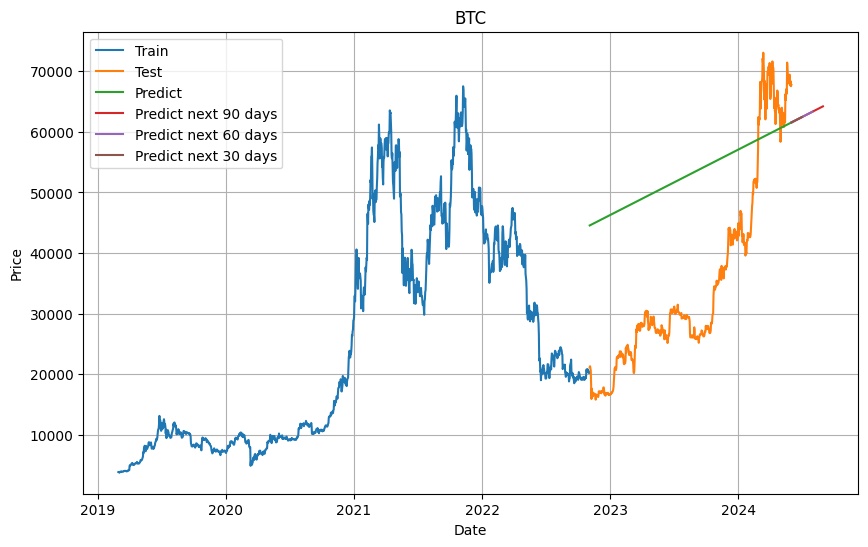

In [218]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [68]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,135.31,135.36,137.88,135,803.72K,-0.02%
1918,2019-03-02,132.54,135.32,135.98,130.32,869.32K,-2.05%
1917,2019-03-03,130.45,132.54,134.58,128.65,786.86K,-1.58%
1916,2019-03-04,125.76,130.44,130.95,122.85,943.18K,-3.59%
1915,2019-03-05,136.59,125.75,137.86,125.14,1.04M,8.61%


In [69]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [45]:
split_size = int(0.7 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [46]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [47]:
train_size = round(len(X) * 0.7)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_test_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 90.81317476197633
RMSE: 1685.087044920083
MAE: 1634.1721216574838


In [51]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [52]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

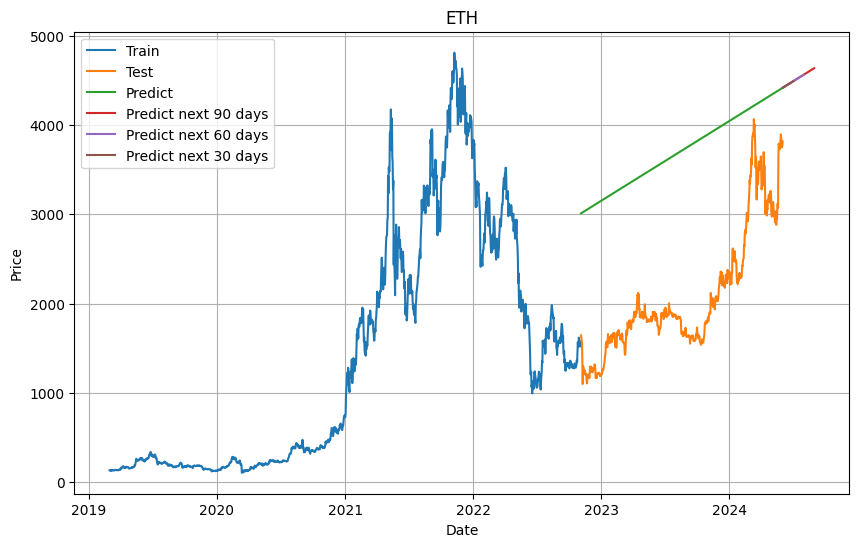

In [54]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('ETH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [82]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,11.35,10.27,11.55,10.24,4.02M,10.45%
1918,2019-03-02,11.75,11.33,11.80,10.83,3.89M,3.56%
1917,2019-03-03,11.45,11.74,11.86,11.20,2.86M,-2.58%
1916,2019-03-04,11.41,11.45,11.51,10.88,2.74M,-0.29%
1915,2019-03-05,13.65,11.40,13.74,11.40,8.34M,19.61%


In [83]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [84]:
split_size = int(0.7 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [85]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [86]:
train_size = round(len(X) * 0.7)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_test_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 86.40331780802535
RMSE: 250.28828208365616
MAE: 230.56977579511846


In [90]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [91]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

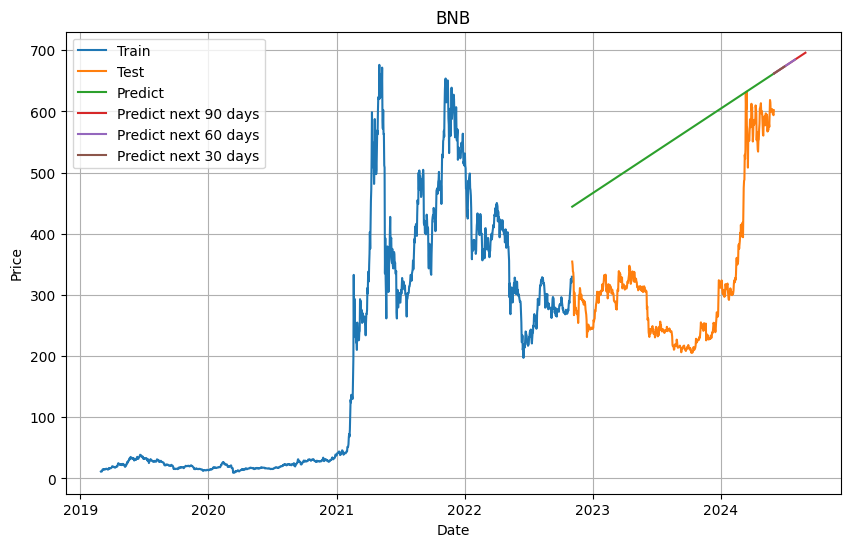

In [92]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BNB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [94]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1918,2019-03-02,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1917,2019-03-03,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1916,2019-03-04,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1915,2019-03-05,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%


In [95]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [96]:
split_size = int(0.8 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [97]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [98]:
train_size = round(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_test_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 29.989021775668345
RMSE: 13640.225060028091
MAE: 11686.037416813424


In [102]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [103]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

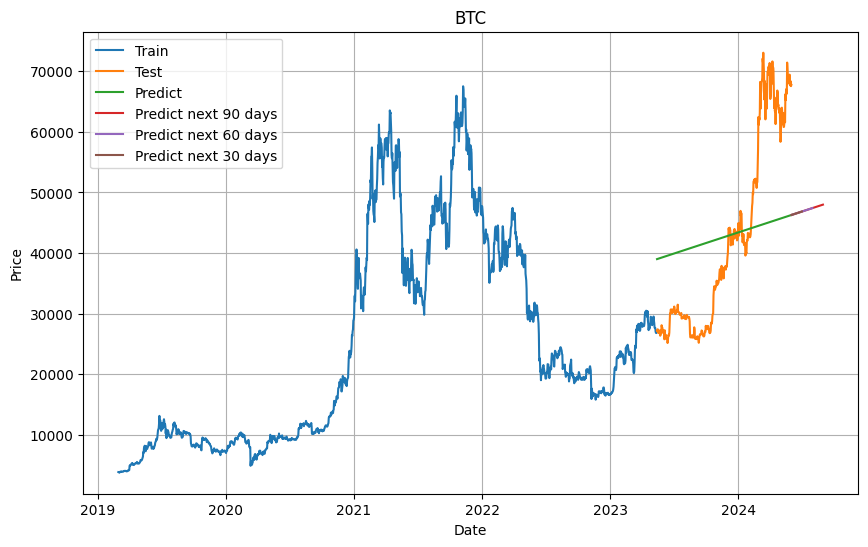

In [104]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [111]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,135.31,135.36,137.88,135,803.72K,-0.02%
1918,2019-03-02,132.54,135.32,135.98,130.32,869.32K,-2.05%
1917,2019-03-03,130.45,132.54,134.58,128.65,786.86K,-1.58%
1916,2019-03-04,125.76,130.44,130.95,122.85,943.18K,-3.59%
1915,2019-03-05,136.59,125.75,137.86,125.14,1.04M,8.61%


In [112]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [113]:
split_size = int(0.8 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [114]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [115]:
train_size = round(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_test_pred = model.predict(X_test)

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 41.50727134452237
RMSE: 893.5727052675272
MAE: 808.895824608522


In [119]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [120]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

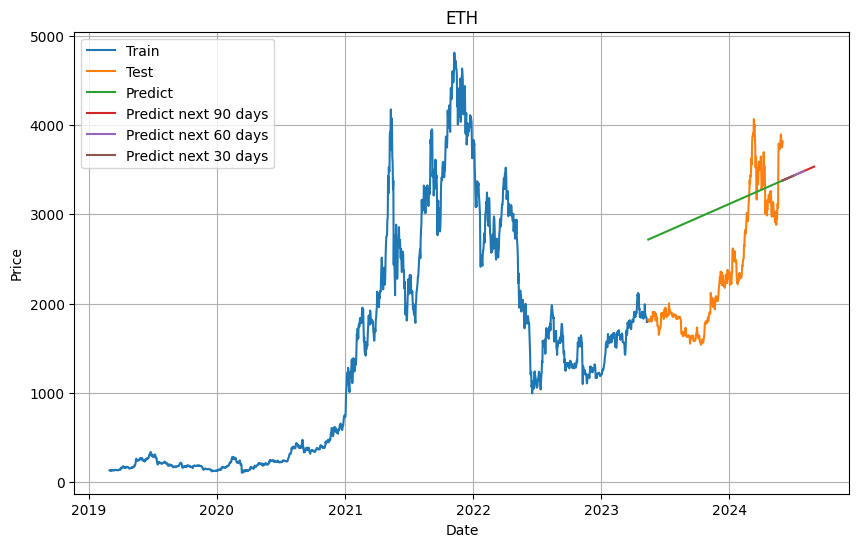

In [121]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('ETH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [130]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,11.35,10.27,11.55,10.24,4.02M,10.45%
1918,2019-03-02,11.75,11.33,11.80,10.83,3.89M,3.56%
1917,2019-03-03,11.45,11.74,11.86,11.20,2.86M,-2.58%
1916,2019-03-04,11.41,11.45,11.51,10.88,2.74M,-0.29%
1915,2019-03-05,13.65,11.40,13.74,11.40,8.34M,19.61%


In [131]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [132]:
split_size = int(0.8 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [133]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [134]:
train_size = round(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_test_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 69.72445102932001
RMSE: 196.35232328499055
MAE: 178.19238342320924


In [138]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [139]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

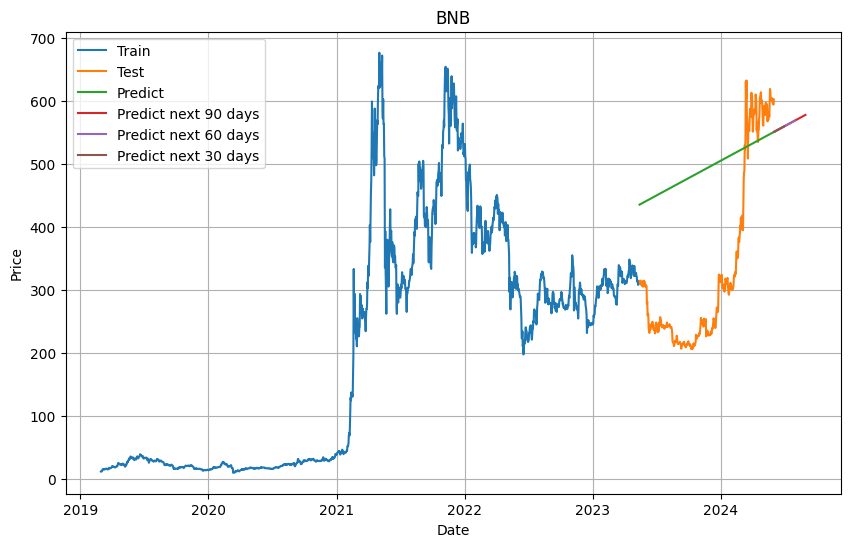

In [140]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BNB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [142]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1918,2019-03-02,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1917,2019-03-03,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1916,2019-03-04,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1915,2019-03-05,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%


In [143]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [144]:
split_size = int(0.9 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [145]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [146]:
train_size = round(len(X) * 0.9)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [147]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [149]:
y_test_pred = model.predict(X_test)

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 25.411790686564384
RMSE: 19141.514910143724
MAE: 15704.47076116939


In [151]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [152]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

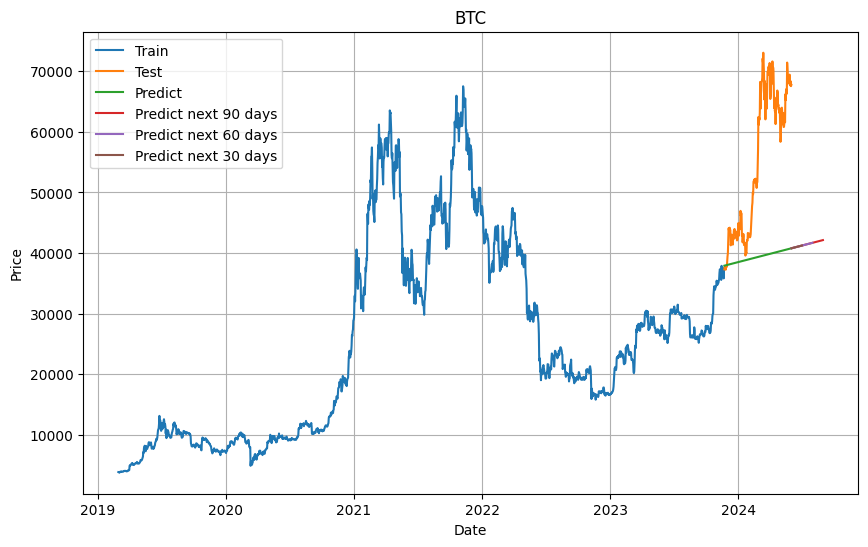

In [153]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [155]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,135.31,135.36,137.88,135,803.72K,-0.02%
1918,2019-03-02,132.54,135.32,135.98,130.32,869.32K,-2.05%
1917,2019-03-03,130.45,132.54,134.58,128.65,786.86K,-1.58%
1916,2019-03-04,125.76,130.44,130.95,122.85,943.18K,-3.59%
1915,2019-03-05,136.59,125.75,137.86,125.14,1.04M,8.61%


In [156]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [157]:
split_size = int(0.9 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [158]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [159]:
train_size = round(len(X) * 0.9)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [161]:
y_test_pred = model.predict(X_test)

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 15.645866460030863
RMSE: 547.3607744352586
MAE: 466.42632538615385


In [163]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [165]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

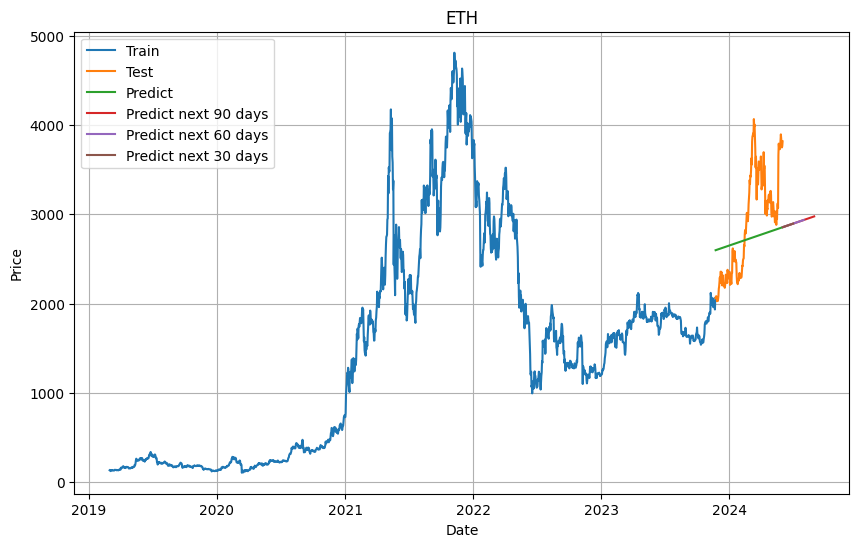

In [166]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('ETH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [168]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,11.35,10.27,11.55,10.24,4.02M,10.45%
1918,2019-03-02,11.75,11.33,11.80,10.83,3.89M,3.56%
1917,2019-03-03,11.45,11.74,11.86,11.20,2.86M,-2.58%
1916,2019-03-04,11.41,11.45,11.51,10.88,2.74M,-0.29%
1915,2019-03-05,13.65,11.40,13.74,11.40,8.34M,19.61%


In [169]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

In [170]:
split_size = int(0.9 * len(df))

train_data = df[:split_size]
test_data = df[split_size:]

In [171]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [172]:
train_size = round(len(X) * 0.9)

X_train, X_test = X[:train_size], X[train_size:] 
y_train, y_test = y[:train_size], y[train_size:]

In [173]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [174]:
y_test_pred = model.predict(X_test)

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = np.array(test_data['Price'])

mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 32.73012139867893
RMSE: 131.96531886974503
MAE: 124.74713073943059


In [176]:
n_days_for_prediction= 90
future_index = pd.date_range(start=list(train_dates)[-1] + pd.DateOffset(days=1), periods=n_days_for_prediction).tolist()

In [177]:
df1 = pd.DataFrame(future_index, columns=['Date'])
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
prediction1 = model.predict(X_pred)

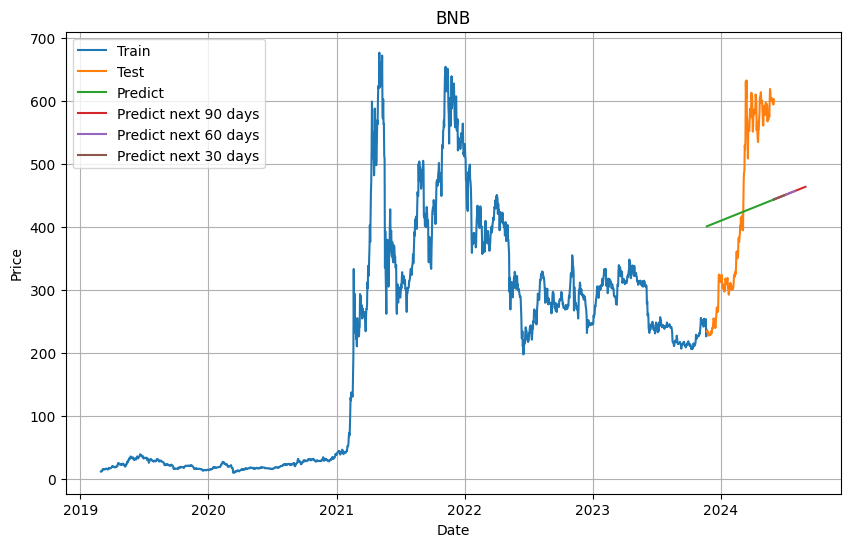

In [178]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', label='Train')
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', label='Test')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', label='Predict')

plt.plot(future_index[-90:], prediction1[-90:], linestyle='-', label='Predict next 90 days')
plt.plot(future_index[:60], prediction1[:60], linestyle='-', label='Predict next 60 days')
plt.plot(future_index[:30], prediction1[:30], linestyle='-', label='Predict next 30 days')
plt.title('BNB')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()